# Churn Modelling

## Importing all Libraries that will be used in performing different operations.

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading Dataframe by using Pandas function

In [78]:
df=pd.read_csv('Churn_Modelling.csv')

## Exploring Dataset

In [79]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [80]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [81]:
df.shape

(10000, 14)

In [82]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [83]:
type(df)

pandas.core.frame.DataFrame

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [85]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [86]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Q_1. Top 10 highest and lowest salary customer details

In [87]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [88]:
df.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


# Q_2. Change the name of these columns - (Balance - income,Geography - Region )

In [89]:
column_changed_df=df.rename(columns={'Balance':'income', 'Geography':'Region'})

In [90]:
column_changed_df

,RowNumber,CustomerId,Surname,CreditScore,Region,Gender,Age,Tenure,income,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [91]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Q_3. Find the Null value in data. If you get any null value what will be your approach to handle it.

In [92]:
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [93]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### From the above table we can see that there is no NULL value in dataset.

# Q_4. Details of Customer those Gender is Female age>30,and Estimated Salary>100000

In [94]:
df[(df['Age']>30) & (df['EstimatedSalary']>100000) & df['Gender']=='Female']

C:\Users\lovek\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
fas_df=df[(df['Gender']=='Female') & (df['Age'] > 30) & (['EstimatedSalary'] > 100000)]

# Q_5. Drop the duplicate if Gender ,Geography and Age Match(also find total number of column that are matching)

In [96]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [97]:
df.duplicated().sum()

0

In [98]:
df.drop_duplicates(subset=['Gender', 'Geography', 'Age'])

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9490,9491,15655171,Yermakova,624,France,Male,80,3,0.00,1,1,1,65801.44,0
9587,9588,15653050,Norriss,719,Germany,Female,76,10,95052.29,1,1,0,176244.87,0
9671,9672,15636061,Pope,649,Germany,Male,78,4,68345.86,2,1,1,142566.75,0
9736,9737,15644103,Wells,659,Spain,Male,78,2,151675.65,1,0,1,49978.67,0


In [99]:
# new_df = df.dropna() to remove NULL values 
# By default, the dropna() method returns a new DataFrame, and will not change the original.
# If you want to change the original DataFrame, use the inplace = True argument.
# The fillna() method allows us to replace empty cells with a value

In [100]:
df.duplicated(subset=['Gender', 'Geography', 'Age']).sum()

9626

# Q_6. Name of the customer there salary between 700000- 800000.

In [143]:
df.loc[(df.EstimatedSalary>700000)&(df.EstimatedSalary<800000), ['Surname']]

,Surname


# Q_7. Details of Customer there location is Spain,France and Exicted(it is column in dataset) from Bank

In [141]:
df.loc[((df.Geography=='Spain') | (df.Geography=='France') )& (df.Exited==1)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
22,23,15699309,Gerasimov,510,Spain,Female,38,4,0.00,1,1,0,118913.53,1
30,31,15589475,Azikiwe,591,Spain,Female,39,3,0.00,3,1,0,140469.38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9947,9948,15732202,Abramovich,615,France,Male,34,1,83503.11,2,1,1,73124.53,1
9956,9957,15707861,Nucci,520,France,Female,46,10,85216.61,1,1,0,117369.52,1
9962,9963,15594612,Flynn,702,Spain,Male,44,9,0.00,1,0,0,59207.41,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1


# Q_8. Define another column within dataframe If salary >100000 - ‘you are eligible for loan’ Else: - ‘you are not eligible for loan’(column name - Loan Eligibility)

In [167]:
df.loc[df['EstimatedSalary'] >100000, 'LoanEligibility'] = 'Eligible'
df.loc[df['EstimatedSalary'] <=100000, 'LoanEligibility'] = 'Not Eligible'

In [168]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,LoanEligibility
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Eligible
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Eligible
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Eligible
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Not Eligible
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Not Eligible


# Q_9. In this Dataframe Region and Gender are in Categorical(String) format - Convert it into the Numerical format so that we can apply ML Algo on it.


In [175]:
df.loc[df['Geography'] == 'France', 'Geography'] = 0
df.loc[df['Geography'] == 'Spain', 'Geography'] = 1
df.loc[df['Gender'] == 'Female', 'Gender'] = 0
df.loc[df['Gender'] == 'Male', 'Gender'] = 1

In [177]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,LoanEligibility
9995,9996,15606229,Obijiaku,771,1,1,39,5,0.00,2,1,0,96270.64,0,Not Eligible
9996,9997,15569892,Johnstone,516,1,1,35,10,57369.61,1,1,1,101699.77,0,Eligible
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1,Not Eligible
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1,Not Eligible
9999,10000,15628319,Walker,792,0,0,28,4,130142.79,1,1,0,38190.78,0,Not Eligible


In [178]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,LoanEligibility
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,Eligible
1,2,15647311,Hill,608,0,0,41,1,83807.86,1,0,1,112542.58,0,Eligible
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,Eligible
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,Not Eligible
4,5,15737888,Mitchell,850,0,0,43,2,125510.82,1,1,1,79084.10,0,Not Eligible


# Q_10. Find relation between x and y (Hint - Matplotlib) X = [1,4,2,6,7] ,Y =[7,5,89,1,90] , (2) plot graph between X and sinX

In [179]:
X = [1,4,2,6,7]
Y = [7,5,89,1,90]

In [190]:
X

[1, 2, 4, 6, 7]

In [191]:
Y

[1, 5, 7, 89, 90]

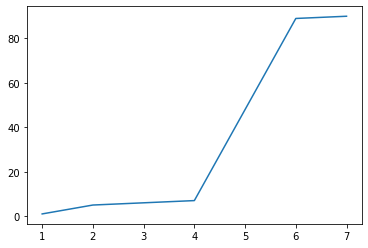

In [192]:
plt.plot(X, Y)

In [197]:
np.correlate(X, Y)

array([1203])

In [195]:
sinx=np.sin(X)
siny=np.sin(Y)

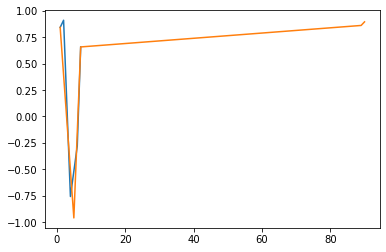

In [196]:
plt.plot(X, sinx)
plt.plot(Y, siny)
